### Загрузка пакетов

In [1]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Загрузка датафрейма

In [2]:
churn_df = pd.read_csv("telecom_churn_clean.csv")
print(churn_df.head())

   Unnamed: 0  account_length  area_code  international_plan  voice_mail_plan  \
0           0             128        415                   0                1   
1           1             107        415                   0                1   
2           2             137        415                   0                0   
3           3              84        408                   1                0   
4           4              75        415                   1                0   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             45.07              197.4             

In [3]:
print(churn_df.columns)

Index(['Unnamed: 0', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge', 'customer_service_calls',
       'churn'],
      dtype='object')


### Разделим данные на целевую переменную и признаки

In [4]:
y = churn_df["churn"].values
print(y)

[0 0 0 ... 0 0 0]


In [5]:
X = churn_df[["account_length", "customer_service_calls"]]
print(X)

      account_length  customer_service_calls
0                128                       1
1                107                       1
2                137                       0
3                 84                       2
4                 75                       3
...              ...                     ...
3328             192                       2
3329              68                       3
3330              28                       2
3331             184                       2
3332              74                       0

[3333 rows x 2 columns]


### Построение классификатора

In [6]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=6)

### Создание набора для тестирования

In [15]:
X_new = np.array([
    [30, 17],
    [107, 24],
    [213, 10],
    [5, 24],
    [435, 1]
])

In [16]:
y_pred = knn.predict(X_new)
print(y_pred)

[0 1 0 0 0]


/Library/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


### Разбитие данных на `train` и `test`

In [30]:
from sklearn.model_selection import train_test_split
X = churn_df.drop("churn", axis=1).values
y = churn_df["churn"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27, stratify=y)

### Обучение и предсказание

In [31]:
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

0.8545727136431784


### Создание множества соседей

In [32]:
neighbors = np.arange(1,30)
train_accuracies = {}
test_accuracies = {}
for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)

print(neighbors, "\n", train_accuracies, "\n", test_accuracies)


[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29] 
 {1: 1.0, 2: 0.8870967741935484, 3: 0.8983495873968492, 4: 0.8743435858964741, 5: 0.8840960240060015, 6: 0.8668417104276069, 7: 0.8713428357089272, 8: 0.8630907726931732, 9: 0.8645911477869468, 10: 0.8589647411852963, 11: 0.8619654913728432, 12: 0.858589647411853, 13: 0.8604651162790697, 14: 0.8567141785446362, 15: 0.8578394598649662, 16: 0.8578394598649662, 17: 0.8589647411852963, 18: 0.8563390847711928, 19: 0.8570892723180795, 20: 0.8563390847711928, 21: 0.8563390847711928, 22: 0.8559639909977494, 23: 0.8559639909977494, 24: 0.8555888972243061, 25: 0.8552138034508627, 26: 0.8552138034508627, 27: 0.8552138034508627, 28: 0.8555888972243061, 29: 0.8555888972243061} 
 {1: 0.8020989505247377, 2: 0.8515742128935532, 3: 0.8425787106446777, 4: 0.8530734632683659, 5: 0.848575712143928, 6: 0.8515742128935532, 7: 0.8530734632683659, 8: 0.856071964017991, 9: 0.8530734632683659, 10: 0.8530734632683659, 11: 

### Оценка модели от количества соседей

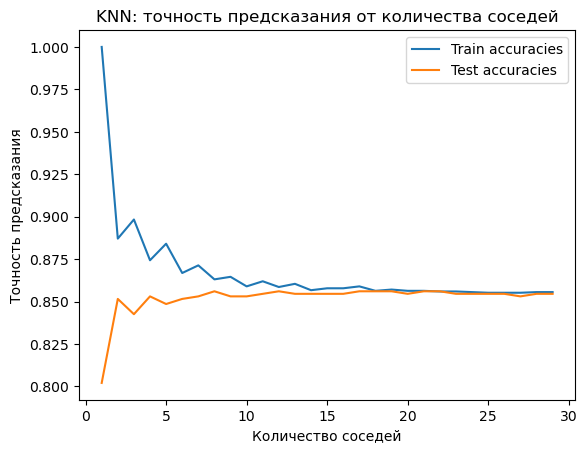

In [33]:
plt.title("KNN: точность предсказания от количества соседей")
plt.plot(neighbors, train_accuracies.values(), label="Train accuracies")
plt.plot(neighbors, test_accuracies.values(), label="Test accuracies")
plt.legend()
plt.xlabel("Количество соседей")
plt.ylabel("Точность предсказания")
plt.show()